In [1]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import CSVLogger, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.vis_utils import plot_model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow
from time import time

import pandas

import pickle as pk

from keras.wrappers.scikit_learn import KerasClassifier

seed = 7

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(seed)

In [3]:
data_dir = '/data/oxford102/train'
img_width, img_height = 256, 256
batch_size = 32
epochs = 100

# Data Augmentation

In [4]:
# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

In [4]:
img = load_img('/data/oxford102/jpg/image_00001.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='flower', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

NameError: name 'datagen' is not defined

(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)
(500, 591, 3)


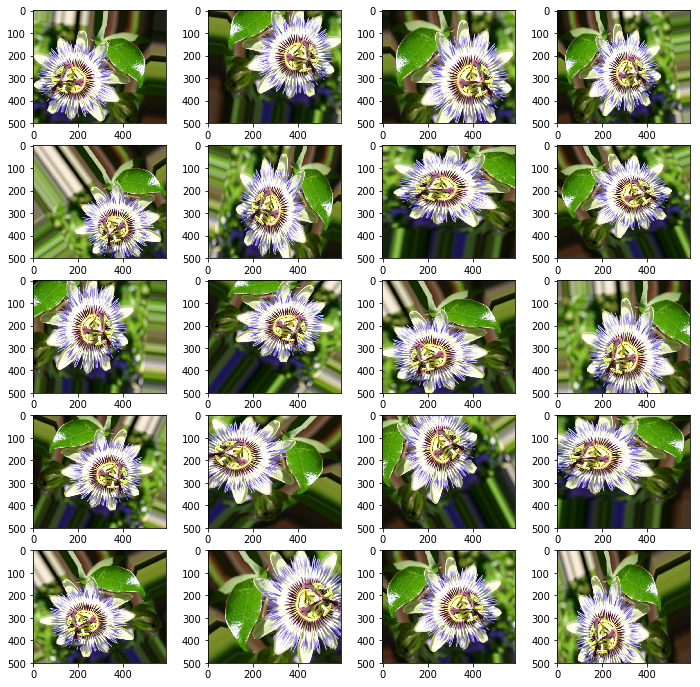

In [5]:
category = "/data/preview/"
imgs = np.random.choice(os.listdir(category), size=20, replace=False)
#os.listdir(category)

w=10
h=10
fig=plt.figure(figsize=(12, 12))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    img=mpimg.imread(category + imgs[i-1])
    print(img.shape)
    imgplot = plt.imshow(img)
plt.show()

# Train small convnet

In [157]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

In [158]:
# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(102, activation="softmax"))
# #model.add(Activation('sigmoid'))


# # #Adding custom Layers 
# # x = model.output
# # x = Flatten()(x)
# # x = Dense(1024, activation="relu")(x)
# # x = Dropout(0.5)(x)
# # #x = Dense(1024, activation="relu")(x)
# # predictions = Dense(nr_categories, activation="softmax")(x)



# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop', 
#               #optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
#               metrics=['accuracy'])

# #model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [159]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_65 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_66 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [82]:
def get_model(optimizer=optimizers.SGD, verbose=False, n_categories=2, image_size=(150,150)):

    img_with, image_height = image_size
    model = None
    model = Sequential()

    #conv_layer1
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(img_with, image_height, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    

    if n_categories == 2:
        model.add(Activation('sigmoid'))
    else:
        model.add(Dense(102, activation="softmax"))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    if verbose:
        model.summary()

    return model

In [7]:
def get_image_generator(image_augmentation=False, validation_split=0.2):
    if not image_augmentation:
        return ImageDataGenerator(rescale=1./255,
                                  validation_split=validation_split)

    return ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=validation_split)

In [8]:
# train_val_datagen_no_aug = get_image_generator()

In [9]:
# train_val_datagen = get_image_generator(True)

In [10]:
# test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# train_generator = train_datagen.flow_from_directory(
#     data_dir,  # this is the target directory
#     target_size=(img_width, img_height),  # all images will be resized to 250x250
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset = "training")

In [12]:
# validation_generator = train_datagen.flow_from_directory(
#     data_dir,  # this is the target directory
#     target_size=(img_width, img_height),  # all images will be resized to 250x250
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset="validation")

In [ ]:
def setup_model(params):
    data_dir = '/data/oxford102/train'
    img_width, img_height = params.get('image_size')
    batch_size =  params.get("batch_size")

    if type(params.get('optimizer')) in [keras.optimizers.Adam, keras.optimizers.SGD, keras.optimizers.RMSprop]:
        opt = params.get('optimizer')
    elif params.get("optimizer") == "rmsprop":
        opt = "rmsprop"
    elif params.get("optimizer") == "sgd":
        opt = optimizers.SGD(lr=0.0001, momentum=0.9)
    elif params.get("optimizer") == "adam":
        opt = optimizers.Adam()    
        
    model = None
    model = get_model(optimizer=opt, image_size=params.get('image_size'), n_categories=102, verbose=True)
       
    return model
    

In [17]:
def get_generators(params):
    img_width, img_height = params.get('image_size')
    batch_size =  params.get("batch_size")
    
    if not params.get("image_aug"):
        train_val_datagen = get_image_generator()
    else: 
        train_val_datagen = get_image_generator(True)

    train_generator = train_val_datagen.flow_from_directory(
        data_dir,  # this is the target directory
        target_size=(img_width, img_height),  # all images will be resized to 250x250
        batch_size=batch_size,
        class_mode='categorical',
        subset = "training")    
        
    validation_generator = train_val_datagen.flow_from_directory(
        data_dir,  # this is the target directory
        target_size=(img_width, img_height),  # all images will be resized to 250x250
        batch_size=batch_size,
        class_mode='categorical',
        subset="validation")
    
    return train_generator, validation_generator

In [18]:
import os

def run_training(model, train_generator, validation_generator, params, num_train_img, num_val_img):
    np.random.seed(seed)
    log_time = time()
    params['log_time'] = log_time
    batch_size = params.get("batch_size")
    
    base = '/data/oxford102/experiments'
    path = os.path.join(base, str(log_time))
    checkpoint = ModelCheckpoint(os.path.join(path, "small_convnet_{}.h5".format(log_time)), monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
    early = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')
    tensorboard = TensorBoard(log_dir="logs/{}".format(log_time), histogram_freq=0, write_graph=True, write_images=True)
    csv_logger = CSVLogger(os.path.join(path, "small_convnet_{}.csv".format(log_time)), append=True, separator=';')

    try:
        if not os.path.exists(path):
            os.makedirs(path)
        history_callback = model.fit_generator(
                train_generator,
                steps_per_epoch=num_train_img // batch_size,
                epochs=params.get("epochs"),
                validation_data=validation_generator,
                validation_steps=num_val_img // batch_size,
                callbacks = [checkpoint, early, tensorboard, csv_logger])
    except Exception as e:
        raise(e)
    finally:
        pk.dump(params, open("experimental_params/experiments_{}.pk".format(log_time), "wb"), protocol=pk.HIGHEST_PROTOCOL)
        model.save_weights(os.path.join(path, 'model_weights_final_{}.h5'.format(log_time)))  # always save your weights after training or during training
        print(params)
        params
        #with open("experiments")
        # Saving the Loss:
        # with the csvlogger callback
        # see the training callba balls

        # with pandas
        #pandas.DataFrame(history_callback.history).to_csv("history_small_convnet_rmsprop_50_100.csv")

        #with numpy
        # loss_history = history_callback.history["loss"]
        # numpy_loss_history = np.array(loss_history)
        # np.savetxt("loss_history_small_convnet_rmsprop_50_100.txt", numpy_loss_history, delimiter=",")


In [19]:
from keras.initializers import glorot_uniform  # Or your initializer of choice
def run(params):
    import tensorflow as tf
    sess = tf.Session()

    from keras import backend as K
    K.set_session(sess)
    model = None
    import gc
    gc.collect()
    model = setup_model(params)
    initial_weights = model.get_weights()
    with sess.as_default():
      new_weights = [glorot_uniform()(w.shape).eval() for w in initial_weights]
    model.set_weights(new_weights)
    train_generator, validation_generator = get_generators(params)
    run_training(model, train_generator, validation_generator, params, 4604, 1094)

# TRAINING

In [180]:
training_params = {
    1: {'log_time': None, 'optimizer': optimizers.rmsprop, 'image_augmentation': True, "tensorboard_id":1},
    2: {'log_time': None, 'optimizer': optimizers.rmsprop, 'image_augmentation': False, "tensorboard_id":2},
    2: {'log_time': None, 'optimizer': optimizers.SGD(lr=0.0001, momentum=0.9), 'image_augmentation': True, "tensorboard_id":3},
    2: {'log_time': None, 'optimizer': optimizers.SGD(lr=0.0001, momentum=0.9), 'image_augmentation': False, "tensorboard_id":4},
}

In [181]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}

In [191]:
model = setup_model(params)
train_generator, validation_generator = get_generators(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_86 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_87 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [183]:
run_training(model, train_generator, validation_generator, params, 4604, 1094)

Epoch 1/100
143/143 [==============================] - 45s 316ms/step - loss: 4.5521 - acc: 0.0449 - val_loss: 4.4368 - val_acc: 0.0460

Epoch 00001: val_acc improved from -inf to 0.04596, saving model to /data/oxford102/small_convnet_rmsprop_1541280636.0738575.h5
Epoch 2/100
143/143 [==============================] - 41s 289ms/step - loss: 4.0448 - acc: 0.0935 - val_loss: 3.8645 - val_acc: 0.1085

Epoch 00002: val_acc improved from 0.04596 to 0.10846, saving model to /data/oxford102/small_convnet_rmsprop_1541280636.0738575.h5
Epoch 3/100
143/143 [==============================] - 41s 287ms/step - loss: 3.6043 - acc: 0.1399 - val_loss: 3.6727 - val_acc: 0.1268

Epoch 00003: val_acc improved from 0.10846 to 0.12684, saving model to /data/oxford102/small_convnet_rmsprop_1541280636.0738575.h5
Epoch 4/100
143/143 [==============================] - 38s 268ms/step - loss: 3.3926 - acc: 0.1846 - val_loss: 3.5478 - val_acc: 0.1305

Epoch 00004: val_acc improved from 0.12684 to 0.13051, saving 

In [25]:
params['log_time'] = 1541280636.0738575
params['optimizer'] = "rmsprop"

In [26]:
params

{'image_aug': False,
 'optimizer': 'rmsprop',
 'batch_size': 16,
 'epochs': 100,
 'image_size': (256, 256),
 'log_time': 1541280636.0738575}

In [41]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}

In [ ]:
run(params)

In [24]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}

In [195]:
model = setup_model(params)
train_generator, validation_generator = get_generators(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_90 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_91 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [196]:
run_training(model, train_generator, validation_generator, params, 4604, 1094)

Epoch 1/100
143/143 [==============================] - 41s 286ms/step - loss: 4.6155 - acc: 0.0105 - val_loss: 4.5992 - val_acc: 0.0147

Epoch 00001: val_acc improved from -inf to 0.01471, saving model to /data/small_convnet_rmsprop_1541282206.2238407.h5
Epoch 2/100
143/143 [==============================] - 38s 267ms/step - loss: 4.5883 - acc: 0.0188 - val_loss: 4.5669 - val_acc: 0.0147

Epoch 00002: val_acc did not improve from 0.01471
Epoch 3/100
143/143 [==============================] - 40s 281ms/step - loss: 4.5671 - acc: 0.0227 - val_loss: 4.5429 - val_acc: 0.0221

Epoch 00003: val_acc improved from 0.01471 to 0.02206, saving model to /data/small_convnet_rmsprop_1541282206.2238407.h5
Epoch 4/100
143/143 [==============================] - 38s 267ms/step - loss: 4.5467 - acc: 0.0235 - val_loss: 4.5200 - val_acc: 0.0276

Epoch 00004: val_acc improved from 0.02206 to 0.02757, saving model to /data/small_convnet_rmsprop_1541282206.2238407.h5
Epoch 5/100
143/143 [=====================

In [199]:
params

{'image_aug': False,
 'optimizer': 'sgd',
 'batch_size': 16,
 'epochs': 100,
 'image_size': (256, 256),
 'log_time': 1541282206.2238407}

In [207]:
# params = {'image_aug': False,
#          'optimizer': 'sgd', 
#          'batch_size': 16,
#          'epochs': 100,
#          'image_size': (256, 256),
#          'log_time': None}

In [211]:
params['optimizer'] = "adam"

In [221]:
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_106 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_107 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [225]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}

In [226]:
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_110 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_111 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 60, 60, 64)        18496     
__________

Epoch 26/100
143/143 [==============================] - 38s 267ms/step - loss: 3.9269 - acc: 0.1171 - val_loss: 4.0244 - val_acc: 0.0993

Epoch 00026: val_acc did not improve from 0.11029
Epoch 27/100
143/143 [==============================] - 38s 265ms/step - loss: 3.8310 - acc: 0.1307 - val_loss: 4.0434 - val_acc: 0.0864

Epoch 00027: val_acc did not improve from 0.11029
Epoch 28/100
143/143 [==============================] - 38s 263ms/step - loss: 3.8433 - acc: 0.1324 - val_loss: 4.0048 - val_acc: 0.1011

Epoch 00028: val_acc did not improve from 0.11029
Epoch 29/100
143/143 [==============================] - 38s 265ms/step - loss: 3.7637 - acc: 0.1364 - val_loss: 3.9287 - val_acc: 0.0938

Epoch 00029: val_acc did not improve from 0.11029
Epoch 30/100
143/143 [==============================] - 39s 270ms/step - loss: 3.7487 - acc: 0.1458 - val_loss: 3.9656 - val_acc: 0.1121

Epoch 00030: val_acc improved from 0.11029 to 0.11213, saving model to /data/oxford102/experiments/1541285373.

In [20]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}

In [31]:
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 64)        18496     
__________

# Add dropout after each conv

In [42]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_14 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 62, 62, 32)        0         
__________

# DROPOUT AGAIN ONLY ON DENSE LAYER

In [45]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_17 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_18 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [74]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_69 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_70 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [77]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_77 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_78 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [78]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_81 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_82 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [79]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_85 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_86 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [80]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_89 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_90 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [27]:
params = {'image_aug': True,
         'optimizer': 'rmsprop', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [28]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [29]:
params = {'image_aug': True,
         'optimizer': 'adam', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 64)        18496     
__________

In [30]:
params = {'image_aug': True,
         'optimizer': 'adam', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_14 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [31]:
params = {'image_aug': False,
         'optimizer': 'adam', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_17 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_18 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [32]:
params = {'image_aug': False,
         'optimizer': 'adam', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_22 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [33]:
params = {'image_aug': True,
         'optimizer': 'sgd', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_25 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_26 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [34]:
params = {'image_aug': True,
         'optimizer': 'sgd', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_29 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_30 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 60, 60, 64)        18496     
__________

# END

In [ ]:

#model.save_weights('first_try.h5')  # always save your weights after training or during training

In [40]:
# Saving the Loss:
# with the csvlogger callback
# see the training callba balls

# with pandas
#pandas.DataFrame(history_callback.history).to_csv("history_small_convnet_rmsprop_50_100.csv")

#with numpy
# loss_history = history_callback.history["loss"]
# numpy_loss_history = np.array(loss_history)
# np.savetxt("loss_history_small_convnet_rmsprop_50_100.txt", numpy_loss_history, delimiter=",")

In [38]:
# checkpoint = ModelCheckpoint("/data/oxford102/small_convnet_rmsprop_50_100.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=0, write_graph=True, write_images=True)
# csv_logger = CSVLogger('small_convnet_1.csv', append=True, separator=';')


In [39]:
# history_callback = model.fit_generator(
#         train_generator,
#         steps_per_epoch=4604 // batch_size,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=1094 // batch_size,
#         callbacks = [checkpoint, early, tensorboard, csv_logger])
# #model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
143/143 [==============================] - 138s 962ms/step - loss: 2.1866 - acc: 0.4259 - val_loss: 2.2184 - val_acc: 0.4449

Epoch 00001: val_acc improved from -inf to 0.44485, saving model to /data/oxford102/small_convnet_rmsprop_50_100.h5
Epoch 2/50
143/143 [==============================] - 136s 952ms/step - loss: 2.1981 - acc: 0.4379 - val_loss: 2.4922 - val_acc: 0.3925

Epoch 00002: val_acc did not improve from 0.44485
Epoch 3/50
143/143 [==============================] - 136s 948ms/step - loss: 2.1921 - acc: 0.4314 - val_loss: 2.2402 - val_acc: 0.4320

Epoch 00003: val_acc did not improve from 0.44485
Epoch 4/50
143/143 [==============================] - 135s 947ms/step - loss: 2.1730 - acc: 0.4242 - val_loss: 2.5977 - val_acc: 0.3869

Epoch 00004: val_acc did not improve from 0.44485
Epoch 5/50
143/143 [==============================] - 135s 943ms/step - loss: 2.1493 - acc: 0.4379 - val_loss: 2.2394 - val_acc: 0.4347

Epoch 00005: val_acc did not improve from 0.44485

In [ ]:
# model.predict_classes()

In [ ]:
# no image aug

In [44]:
# train_generator = train_datagen_no_aug.flow_from_directory(
#     data_dir,  # this is the target directory
#     target_size=(img_width, img_height),  # all images will be resized to 250x250
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset = "training")

# validation_generator = train_datagen_no_aug.flow_from_directory(
#     data_dir,  # this is the target directory
#     target_size=(img_width, img_height),  # all images will be resized to 250x250
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset="validation")

Found 4604 images belonging to 102 classes.
Found 1094 images belonging to 102 classes.


In [ ]:
# checkpoint = ModelCheckpoint("/data/oxford102/small_convnet_rmsprop_50_100_nodaug.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=0, write_graph=True, write_images=True)
# csv_logger = CSVLogger('small_convnet_1.csv', append=True, separator=';')


In [ ]:
# history_callback = model.fit_generator(
#         train_generator,
#         steps_per_epoch=4604 // batch_size,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=1094 // batch_size,
#         callbacks = [checkpoint, early, tensorboard, csv_logger])
# #model.save_weights('first_try.h5')  # always save your weights after training or during training

In [35]:
params = {'image_aug': True,
         'optimizer': 'rmsprop', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_33 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_34 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [36]:
params = {'image_aug': True,
         'optimizer': 'rmsprop', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_37 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_38 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [37]:
params = {'image_aug': True,
         'optimizer': 'rmsprop', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_41 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_42 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [38]:
params = {'image_aug': True,
         'optimizer': 'rmsprop', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_45 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_46 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [39]:
###

In [40]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_49 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_50 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [41]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_53 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_54 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [43]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_57 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_58 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [44]:
params = {'image_aug': False,
         'optimizer': 'rmsprop', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_61 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_62 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 60, 60, 64)        18496     
__________

KeyboardInterrupt: 

In [76]:
params = {'image_aug': False,
         'optimizer': "rmsprop", 
         'batch_size': 128,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

rmsprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_89 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_90 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 60, 60, 64)        18496     
__

In [ ]:
params = {'image_aug': True,
         'optimizer': "rmsprop", 
         'batch_size': 128,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
###

In [ ]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
params = {'image_aug': False,
         'optimizer': 'sgd', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
###

In [ ]:
params = {'image_aug': True,
         'optimizer': 'sgd', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [85]:
params = {'image_aug': True,
         'optimizer': 'sgd', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

sgd
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_109 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_110 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 60, 60, 64)        18496     
______

In [ ]:
params = {'image_aug': True,
         'optimizer': 'sgd', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [86]:
params = {'image_aug': True,
         'optimizer': 'sgd', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

sgd
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_113 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_114 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 60, 60, 64)        18496     
______

In [ ]:
###

In [ ]:
params = {'image_aug': True,
         'optimizer': 'adam', 
         'batch_size': 8,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
params = {'image_aug': True,
         'optimizer': 'adam', 
         'batch_size': 16,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
params = {'image_aug': True,
         'optimizer': 'adam', 
         'batch_size': 32,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [83]:
params = {'image_aug': True,
         'optimizer': 'adam', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_101 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_102 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 60, 60, 64)        18496     
_____

In [84]:
params = {'image_aug': False,
         'optimizer': 'adam', 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_105 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_106 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 60, 60, 64)        18496     
_____

In [ ]:
## change LR, dropout, momentum

In [69]:
params = {'image_aug': False,
         'optimizer': keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_65 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_66 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 60, 60, 64)        18496     
__________

TypeError: can't pickle _thread.RLock objects

In [70]:
params = {'image_aug': False,
         'optimizer': keras.optimizers.RMSprop(lr=0.1, rho=0.9, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_69 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_70 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 60, 60, 64)        18496     
__________

TypeError: can't pickle _thread.RLock objects

In [71]:
params = {'image_aug': False,
         'optimizer': keras.optimizers.RMSprop(lr=0.001, rho=0.5, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_73 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_74 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 60, 60, 64)        18496     
__________

TypeError: can't pickle _thread.RLock objects

In [87]:
params = {'image_aug': False,
         'optimizer': keras.optimizers.RMSprop(lr=0.01, rho=0.5, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_117 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_118 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 60, 60, 64)        18496     
__________

TypeError: can't pickle _thread.RLock objects

In [88]:
params = {'image_aug': False,
         'optimizer': keras.optimizers.RMSprop(lr=0.1, rho=0.5, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_121 (Activation)  (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_122 (Activation)  (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 60, 60, 64)        18496     
__________

TypeError: can't pickle _thread.RLock objects

If the loss increases and the accuracy increase too is because your regularization techniques are working well and you're fighting the overfitting problem. This is true only if the loss, then, starts to decrease whilst the accuracy continues to increase. Otherwise, if the loss keep growing your model is diverging and you should look for the cause (usually you're using a too high learning rate value).

### decrease lr

In [73]:
params = {'image_aug': True,
         'optimizer': keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_81 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_82 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 60, 60, 64)        18496     
__________

TypeError: can't pickle _thread.RLock objects

In [ ]:
params = {'image_aug': True,
         'optimizer': keras.optimizers.RMSprop(lr=0.0001, rho=0.5, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

In [ ]:
# lets add decay, so we can get closer to the local minimum

In [74]:
params = {'image_aug': True,
         'optimizer': keras.optimizers.RMSprop(lr=0.001, rho=0.5, epsilon=None, decay=0.1), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_85 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_86 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 60, 60, 64)        18496     
__________

TypeError: can't pickle _thread.RLock objects

In [ ]:
# batch size

In [78]:
# Dropout (0.2 conv layers, 0.5 final)

In [80]:
params = {'image_aug': True,
         'optimizer': "rmsprop",# keras.optimizers.RMSprop(lr=0.01, rho=0.5, epsilon=None, decay=0.0), 
         'batch_size': 128,
         'epochs': 100,
         'image_size': (256, 256),
         'log_time': None}
run(params)

rmsprop
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_93 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_94 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 62, 62, 32)        0         
__


Epoch 00023: val_acc improved from 0.26465 to 0.28125, saving model to /data/oxford102/experiments/1541377695.9360652/small_convnet_1541377695.9360652.h5
Epoch 24/100
35/35 [==============================] - 112s 3s/step - loss: 2.7753 - acc: 0.2799 - val_loss: 2.9472 - val_acc: 0.2764

Epoch 00024: val_acc did not improve from 0.28125
Epoch 25/100
35/35 [==============================] - 111s 3s/step - loss: 2.6935 - acc: 0.2980 - val_loss: 2.9991 - val_acc: 0.2480

Epoch 00025: val_acc did not improve from 0.28125
Epoch 26/100
35/35 [==============================] - 110s 3s/step - loss: 2.6976 - acc: 0.2933 - val_loss: 2.8862 - val_acc: 0.2656

Epoch 00026: val_acc did not improve from 0.28125
Epoch 00026: early stopping
{'image_aug': True, 'optimizer': 'rmsprop', 'batch_size': 128, 'epochs': 100, 'image_size': (256, 256), 'log_time': 1541377695.9360652}


In [ ]:
# image size

In [ ]:
params = {'image_aug': True,
         'optimizer': keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (128, 128),
         'log_time': None}
run(params)

In [ ]:
params = {'image_aug': True,
         'optimizer': keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), 
         'batch_size': 64,
         'epochs': 100,
         'image_size': (512, 512),
         'log_time': None}
run(params)

In [55]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [56]:
def preprocess_img(img):

    image=mpimg.imread(img)
    imgplot = plt.imshow(image)

    image = load_img(img, target_size=(256, 256))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # do the same preprocessing as the vgg did
    image = preprocess_input(image)
    return image

In [57]:
def predict(img_arr):
    # predict the probability across all output classes
    yhat = model.predict(img_arr)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))

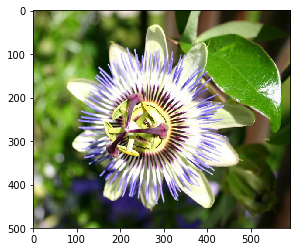

In [59]:
img = '/data/oxford102/jpg/image_00001.jpg'
image_array = preprocess_img(img)
#predict(image_array)

In [34]:
plot_model(model, to_file='baseline_CNN.png')

In [80]:
pred = model.predict_proba(image_array)

In [61]:
class_labels = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum', 'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium', 'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen ', 'watercress', 'canna lily', 'hippeastrum ', 'bee balm', 'ball moss', 'foxglove', 'bougainvillea', 'camellia', 'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']

In [62]:
_class_labels = np.array(class_labels)

In [67]:
_class_labels

array(['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells',
       'sweet pea', 'english marigold', 'tiger lily', 'moon orchid',
       'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon',
       "colt's foot", 'king protea', 'spear thistle', 'yellow iris',
       'globe-flower', 'purple coneflower', 'peruvian lily',
       'balloon flower', 'giant white arum lily', 'fire lily',
       'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth',
       'corn poppy', 'prince of wales feathers', 'stemless gentian',
       'artichoke', 'sweet william', 'carnation', 'garden phlox',
       'love in the mist', 'mexican aster', 'alpine sea holly',
       'ruby-lipped cattleya', 'cape flower', 'great masterwort',
       'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil',
       'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower',
       'marigold', 'buttercup', 'oxeye daisy', 'common dandelion',
       'petunia', 'wild pansy', 'primula', 'sunflower

In [79]:
for i,x in enumerate(pred[0]):
    if x == 1.0:
        print(_class_labels[i])

oxeye daisy


In [83]:
probabilities = model.predict_generator(validation_generator)

In [97]:
probabilities[1]> 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

# optimizer=SGD

In [15]:
# checkpoint = ModelCheckpoint("/data/oxford102/small_convnet_sgd.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=0, write_graph=True, write_images=True)

In [16]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=5698 // batch_size,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=2441 // batch_size,
#         callbacks = [checkpoint, early, tensorboard])
# #model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
356/356 [==============================] - 114s 320ms/step - loss: 4.6108 - acc: 0.0170 - val_loss: 4.5910 - val_acc: 0.0189

Epoch 00001: val_acc improved from -inf to 0.01891, saving model to /data/oxford102/small_convnet_sgd.h5
Epoch 2/50
356/356 [==============================] - 114s 320ms/step - loss: 4.5813 - acc: 0.0242 - val_loss: 4.5587 - val_acc: 0.0362

Epoch 00002: val_acc improved from 0.01891 to 0.03618, saving model to /data/oxford102/small_convnet_sgd.h5
Epoch 3/50
356/356 [==============================] - 114s 319ms/step - loss: 4.5638 - acc: 0.0251 - val_loss: 4.5389 - val_acc: 0.0354

Epoch 00003: val_acc did not improve from 0.03618
Epoch 4/50
356/356 [==============================] - 114s 320ms/step - loss: 4.5526 - acc: 0.0270 - val_loss: 4.5243 - val_acc: 0.0329

Epoch 00004: val_acc did not improve from 0.03618
Epoch 5/50
356/356 [==============================] - 114s 319ms/step - loss: 4.5374 - acc: 0.0297 - val_loss: 4.5045 - val_acc: 0.0391

Ep

356/356 [==============================] - 113s 319ms/step - loss: 3.2517 - acc: 0.1984 - val_loss: 3.0567 - val_acc: 0.2562

Epoch 00036: val_acc improved from 0.25452 to 0.25617, saving model to /data/oxford102/small_convnet_sgd.h5
Epoch 37/50
356/356 [==============================] - 112s 315ms/step - loss: 3.1939 - acc: 0.2214 - val_loss: 3.0105 - val_acc: 0.2599

Epoch 00037: val_acc improved from 0.25617 to 0.25987, saving model to /data/oxford102/small_convnet_sgd.h5
Epoch 38/50
356/356 [==============================] - 112s 313ms/step - loss: 3.1559 - acc: 0.2221 - val_loss: 2.9975 - val_acc: 0.2627

Epoch 00038: val_acc improved from 0.25987 to 0.26275, saving model to /data/oxford102/small_convnet_sgd.h5
Epoch 39/50
356/356 [==============================] - 111s 311ms/step - loss: 3.1410 - acc: 0.2323 - val_loss: 2.9733 - val_acc: 0.2854

Epoch 00039: val_acc improved from 0.26275 to 0.28536, saving model to /data/oxford102/small_convnet_sgd.h5
Epoch 40/50
356/356 [=======

# With Data augmentation

In [23]:
# checkpoint = ModelCheckpoint("/data/oxford102/small_convnet_rmsprop_more_augmentation.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=1, mode='auto')
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=0, write_graph=True, write_images=True)
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=5698 // batch_size,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=2441 // batch_size,
#         callbacks = [checkpoint, early, tensorboard])
# #model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
356/356 [==============================] - 115s 323ms/step - loss: 4.2427 - acc: 0.0620 - val_loss: 3.7434 - val_acc: 0.1172

Epoch 00001: val_acc improved from -inf to 0.11719, saving model to /data/oxford102/small_convnet_rmsprop_more_augmentation.h5
Epoch 2/50
356/356 [==============================] - 115s 324ms/step - loss: 3.6455 - acc: 0.1178 - val_loss: 3.2986 - val_acc: 0.1945

Epoch 00002: val_acc improved from 0.11719 to 0.19449, saving model to /data/oxford102/small_convnet_rmsprop_more_augmentation.h5
Epoch 3/50
356/356 [==============================] - 115s 322ms/step - loss: 3.3467 - acc: 0.1733 - val_loss: 3.0784 - val_acc: 0.2484

Epoch 00003: val_acc improved from 0.19449 to 0.24836, saving model to /data/oxford102/small_convnet_rmsprop_more_augmentation.h5
Epoch 4/50
356/356 [==============================] - 115s 322ms/step - loss: 3.1507 - acc: 0.2242 - val_loss: 3.4569 - val_acc: 0.2270

Epoch 00004: val_acc did not improve from 0.24836
Epoch 5/50
356/

In [ ]:
# batch_size = 16

# # this is the augmentation configuration we will use for training
# train_datagen_no_aug = ImageDataGenerator(
#         rescale=1./255,
#         validation_split=0.2
# )
# train_datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest',
#         validation_split=0.2)

# # this is the augmentation configuration we will use for testing:
# # only rescaling
# test_datagen = ImageDataGenerator(rescale=1./255)

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
# # train_generator = train_datagen.flow_from_directory(
# #         '/data/oxford102/train',  # this is the target directory
# #         target_size=(150, 150),  # all images will be resized to 150x150
# #         batch_size=batch_size,
# #         class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# # # this is a similar generator, for validation data
# # validation_generator = test_datagen.flow_from_directory(
# #         '/data/oxford102/val',
# #         target_size=(150, 150),
# #         batch_size=batch_size,
# #         class_mode='categorical')

# data_dir = '/data/oxford102/train'
# img_width, img_height = 256, 256
# batch_size = 32
# epochs = 100
    
# train_generator = train_datagen.flow_from_directory(
#     data_dir,  # this is the target directory
#     target_size=(img_width, img_height),  # all images will be resized to 250x250
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset = "training")

# validation_generator = train_datagen.flow_from_directory(
#     data_dir,  # this is the target directory
#     target_size=(img_width, img_height),  # all images will be resized to 250x250
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset="validation")